## 1. Data cleaning and feature engineering

In [24]:
import pandas as pd

In [25]:
raw_data = pd.read_csv("train.csv")

In [26]:
raw_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [27]:
raw_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
raw_data.drop_duplicates(inplace=True)

Drop rows where 'survived' is null

In [29]:
raw_data.dropna(subset=["Survived"], inplace=True)

In [30]:
raw_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [33]:
rows_with_nan = raw_data[raw_data.isna().any(axis=1)]
rows_with_nan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [34]:
raw_data['family_size'] = raw_data['SibSp'] + raw_data['Parch'] + 1

In [35]:
raw_data['IsAlone'] = raw_data['family_size'].apply(lambda x: 1 if x == 1 else 0)

In [36]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [37]:
raw_data['TicketCount'] = raw_data.groupby('Ticket')['Ticket'].transform('count')

In [38]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,IsAlone,TicketCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,1


In [39]:
raw_data.loc[raw_data['TicketCount'] > 1, 'IsAlone'] = 0

In [41]:
raw_data['IsAlone'].value_counts()

IsAlone
1    462
0    429
Name: count, dtype: int64

In [40]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,IsAlone,TicketCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,1


In [42]:
raw_data.drop(columns=['Ticket'], inplace=True)

In [43]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,family_size,IsAlone,TicketCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,2,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1,1,1


In [44]:
raw_data['FarePerPerson'] = raw_data['Fare'] / raw_data['TicketCount']

In [46]:
raw_data.drop(columns=['Fare'], inplace=True)

In [47]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Cabin,Embarked,family_size,IsAlone,TicketCount,FarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,NaN,S,2,0,1,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C85,C,2,0,1,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,NaN,S,1,1,1,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,C123,S,2,0,2,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,NaN,S,1,1,1,8.0500


In [57]:
raw_data['Cabin'] = raw_data['Cabin'].fillna('M')

In [58]:
raw_data['Deck'] = raw_data['Cabin'].str[0]

In [59]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Cabin,Embarked,family_size,IsAlone,TicketCount,FarePerPerson,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,M,S,2,0,1,7.2500,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C85,C,2,0,1,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,M,S,1,1,1,7.9250,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,C123,S,2,0,2,26.5500,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,M,S,1,1,1,8.0500,M


In [60]:
raw_data.drop(columns = ['Cabin'], inplace=True)

In [61]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,family_size,IsAlone,TicketCount,FarePerPerson,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,2,0,1,7.2500,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,2,0,1,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,1,1,1,7.9250,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,2,0,2,26.5500,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,1,1,1,8.0500,M


In [62]:
raw_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    str    
 4   Sex            891 non-null    str    
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Embarked       889 non-null    str    
 9   family_size    891 non-null    int64  
 10  IsAlone        891 non-null    int64  
 11  TicketCount    891 non-null    int64  
 12  FarePerPerson  891 non-null    float64
 13  Deck           891 non-null    str    
dtypes: float64(2), int64(8), str(4)
memory usage: 97.6 KB


In [70]:
raw_data['Title'] = raw_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_6101/2343313105.py:1: SyntaxWarning: invalid escape sequence '\.'
  raw_data['Title'] = raw_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [71]:
print("Przed uproszczeniem:", raw_data['Title'].unique())

Przed uproszczeniem: <StringArray>
[      'Mr',      'Mrs',     'Miss',   'Master',      'Don',      'Rev',
       'Dr',      'Mme',       'Ms',    'Major',     'Lady',      'Sir',
     'Mlle',      'Col',     'Capt', 'Countess', 'Jonkheer']
Length: 17, dtype: str


In [72]:
raw_data['Title'] = raw_data['Title'].replace(['Lady', 'Countess','Capt', 'Col',
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

raw_data['Title'] = raw_data['Title'].replace('Mlle', 'Miss')
raw_data['Title'] = raw_data['Title'].replace('Ms', 'Miss')
raw_data['Title'] = raw_data['Title'].replace('Mme', 'Mrs')

In [73]:
print("Po uproszczeniu:", raw_data['Title'].value_counts())

Po uproszczeniu: Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


In [74]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
raw_data['Title'] = raw_data['Title'].map(title_mapping)

In [75]:
raw_data['Title'] = raw_data['Title'].fillna(0)

In [76]:
raw_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    str    
 4   Sex            891 non-null    str    
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Embarked       889 non-null    str    
 9   family_size    891 non-null    int64  
 10  IsAlone        891 non-null    int64  
 11  TicketCount    891 non-null    int64  
 12  FarePerPerson  891 non-null    float64
 13  Deck           891 non-null    str    
 14  Title          891 non-null    int64  
dtypes: float64(2), int64(9), str(4)
memory usage: 104.5 KB


In [77]:
raw_data.drop(['Name'], axis=1, inplace=True)

In [78]:
raw_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family_size,IsAlone,TicketCount,FarePerPerson,Deck,Title
0,1,0,3,male,22.0,1,0,S,2,0,1,7.2500,M,1
1,2,1,1,female,38.0,1,0,C,2,0,1,71.2833,C,3
2,3,1,3,female,26.0,0,0,S,1,1,1,7.9250,M,2
3,4,1,1,female,35.0,1,0,S,2,0,2,26.5500,C,3
4,5,0,3,male,35.0,0,0,S,1,1,1,8.0500,M,1


In [79]:
raw_data['Age'] = raw_data['Age'].fillna(raw_data.groupby('Title')['Age'].transform('median'))

In [80]:
raw_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Sex            891 non-null    str    
 4   Age            891 non-null    float64
 5   SibSp          891 non-null    int64  
 6   Parch          891 non-null    int64  
 7   Embarked       889 non-null    str    
 8   family_size    891 non-null    int64  
 9   IsAlone        891 non-null    int64  
 10  TicketCount    891 non-null    int64  
 11  FarePerPerson  891 non-null    float64
 12  Deck           891 non-null    str    
 13  Title          891 non-null    int64  
dtypes: float64(2), int64(9), str(3)
memory usage: 97.6 KB


In [81]:
raw_data = raw_data.dropna(subset=['Embarked'])

In [82]:
raw_data.info()

<class 'pandas.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    889 non-null    int64  
 1   Survived       889 non-null    int64  
 2   Pclass         889 non-null    int64  
 3   Sex            889 non-null    str    
 4   Age            889 non-null    float64
 5   SibSp          889 non-null    int64  
 6   Parch          889 non-null    int64  
 7   Embarked       889 non-null    str    
 8   family_size    889 non-null    int64  
 9   IsAlone        889 non-null    int64  
 10  TicketCount    889 non-null    int64  
 11  FarePerPerson  889 non-null    float64
 12  Deck           889 non-null    str    
 13  Title          889 non-null    int64  
dtypes: float64(2), int64(9), str(3)
memory usage: 104.2 KB


In [83]:
raw_data= raw_data.drop('PassengerId', axis=1)

In [84]:
raw_data['Sex'] = raw_data['Sex'].map({'male': 0, 'female': 1})

In [85]:
raw_data = pd.get_dummies(raw_data, columns=['Embarked', 'Deck'], drop_first=True)

In [86]:
raw_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,family_size,IsAlone,TicketCount,FarePerPerson,...,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_M,Deck_T
0,0,3,0,22.0,1,0,2,0,1,7.2500,...,False,True,False,False,False,False,False,False,True,False
1,1,1,1,38.0,1,0,2,0,1,71.2833,...,False,False,False,True,False,False,False,False,False,False
2,1,3,1,26.0,0,0,1,1,1,7.9250,...,False,True,False,False,False,False,False,False,True,False
3,1,1,1,35.0,1,0,2,0,2,26.5500,...,False,True,False,True,False,False,False,False,False,False
4,0,3,0,35.0,0,0,1,1,1,8.0500,...,False,True,False,False,False,False,False,False,True,False


### 2. Model Training

In [87]:
from sklearn.model_selection import train_test_split
X = raw_data.drop('Survived', axis=1)
y = raw_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = RandomForestClassifier(random_state=42)

In [99]:
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [100]:
predictions = model.predict(X_test)
predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1])

In [101]:
print(f'Accuracy: {accuracy_score(y_test, predictions)}')

Accuracy: 0.7528089887640449


In [102]:
print('Raport klasyfikacji:\n', classification_report(y_test, predictions))

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79       109
           1       0.65      0.77      0.71        69

    accuracy                           0.75       178
   macro avg       0.74      0.76      0.75       178
weighted avg       0.76      0.75      0.76       178



In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

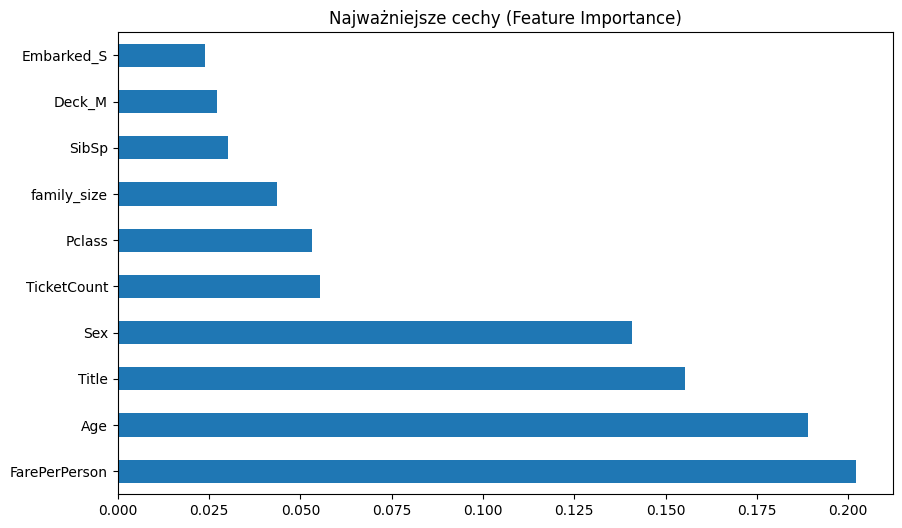

In [105]:
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Najważniejsze cechy (Feature Importance)')
plt.show()

In [ ]:
# improving model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [107]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END m

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and pa

In [ ]:
print(f"Najlepsze parametry: {grid_search.best_params_}")
print(f"Najlepszy wynik (trening): {grid_search.best_score_:.2f}")

Najlepsze parametry: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Najlepszy wynik (trening): 0.86


In [ ]:
best_model = grid_search.best_estimator_
print(f"Dokładność na teście: {best_model.score(X_test, y_test):.2f}")

Dokładność na teście: 0.79


In [110]:
predictions = best_model.predict(X_test)

In [111]:
print('Raport klasyfikacji:\n', classification_report(y_test, predictions))

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.72      0.72      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



In [112]:
importances = best_model.feature_importances_
feature_name = X_train.columns

In [113]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

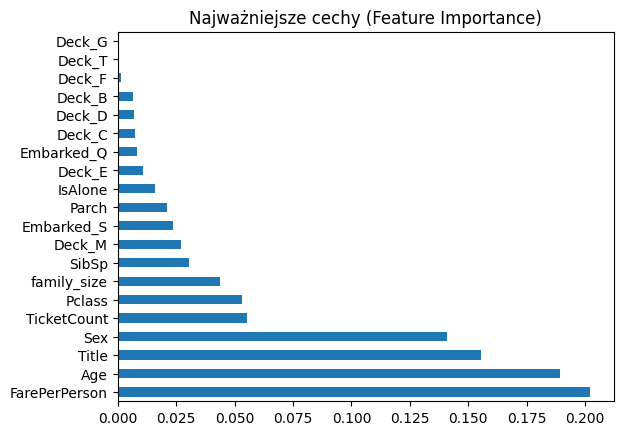

In [115]:
feature_importances.sort_values(ascending=False).plot(kind='barh')
plt.title('Najważniejsze cechy (Feature Importance)')
plt.show()

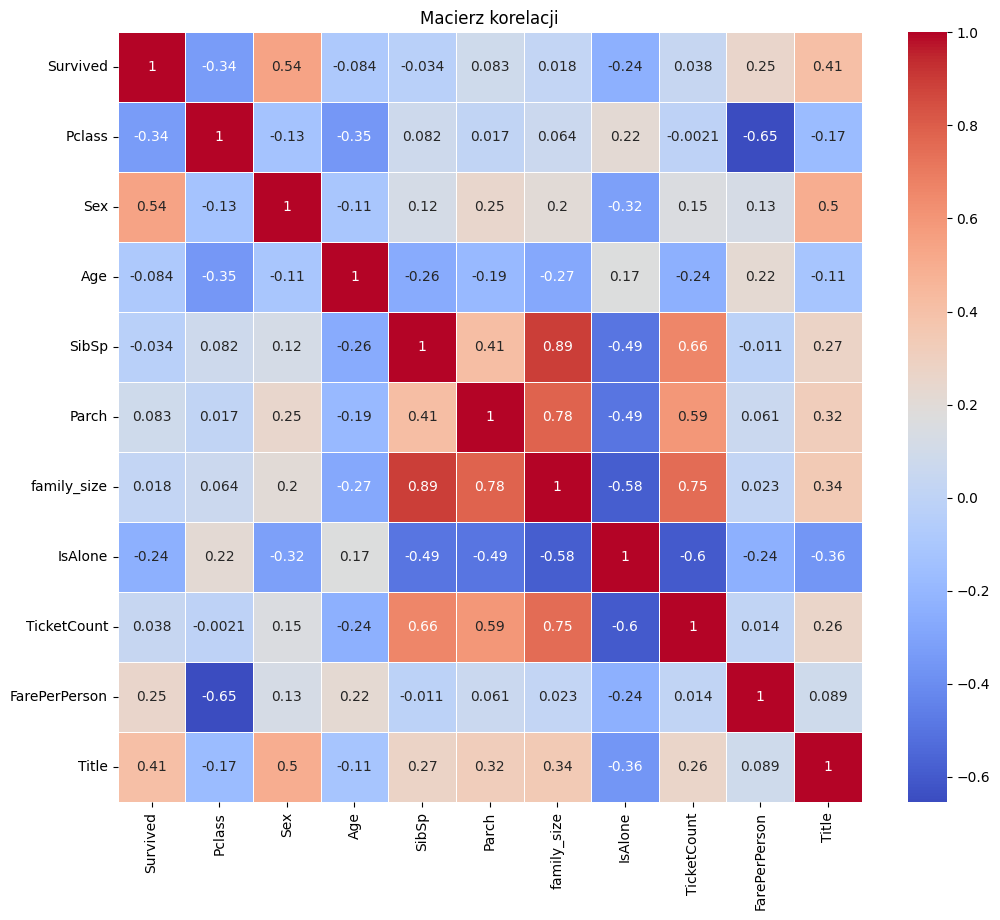

In [116]:
numeric_df = raw_data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Macierz korelacji')
plt.show()

# XGboost

In [117]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [118]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [119]:
xgb_predictions = xgb_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, xgb_predictions)}')

Accuracy: 0.7921348314606742


# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

print(f"Dokładność Regresji Logistycznej: {log_model.score(X_test_scaled, y_test):.2f}")

Dokładność Regresji Logistycznej: 0.81


Wynik ROC-AUC: 0.850


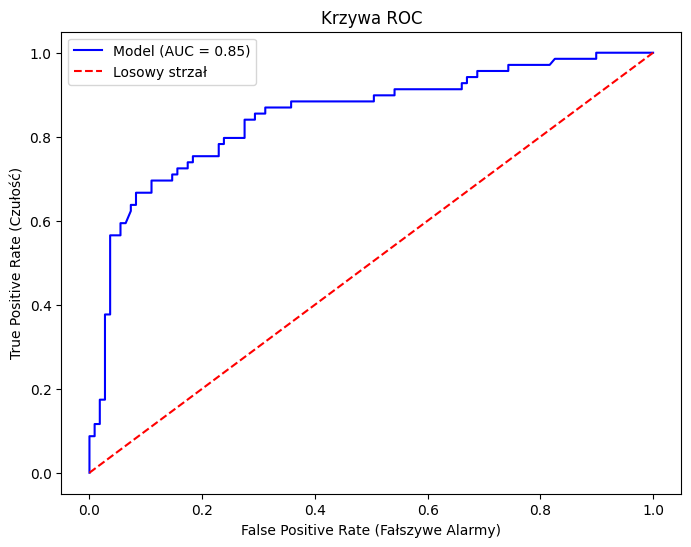

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Musimy pobrać prawdopodobieństwa
# predict_proba zwraca dwie kolumny: [szansa_śmierci, szansa_przeżycia]
# Bierzemy drugą kolumnę ([:, 1])
y_probs = best_model.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_probs)
print(f"Wynik ROC-AUC: {auc_score:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Model (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Losowy strzał') 
plt.xlabel('False Positive Rate (Fałszywe Alarmy)')
plt.ylabel('True Positive Rate (Czułość)')
plt.title('Krzywa ROC')
plt.legend()
plt.show()

### Saving models

In [122]:
import joblib
joblib.dump(best_model, 'best_rf_model.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(log_model, 'logistic_model.pkl')

['logistic_model.pkl']

In [123]:
#hard voting

rf = joblib.load('best_rf_model.pkl')
xgb = joblib.load('xgb_model.pkl')
log = joblib.load('logistic_model.pkl')

In [124]:
glos_rf = rf.predict(X_test)
glos_xgb = xgb.predict(X_test)
glos_log = log.predict(X_test_scaled)

In [ ]:
wyniki = pd.DataFrame({
    'RandomForest': glos_rf,
    'XGBoost': glos_xgb,
    'LogisticRegression': glos_log
})
wyniki.head()


,RandomForest,XGBoost,LogisticRegression
0,0,0,0
1,1,1,1
2,1,0,1
3,0,0,0
4,1,1,1


# Evaluation

In [132]:
wyniki['suma_glosow'] = wyniki['RandomForest'] + wyniki['XGBoost'] + wyniki['LogisticRegression']
wyniki['final_prediction'] = wyniki['suma_glosow'].apply(lambda x: 1 if x >= 2 else 0)
wyniki.head()
niejednoznaczne = wyniki[(wyniki['suma_glosow'] == 1) | (wyniki['suma_glosow'] == 2)]
print(f"Liczba przypadków niejednoznacznych (1 lub 2 głosy): {niejednoznaczne.shape[0]}")
print(f"Dokładność głosowania: {accuracy_score(y_test, wyniki['final_prediction']):.2f}")
print('Raport klasyfikacji dla głosowania:\n', classification_report(y_test, wyniki['final_prediction']))
print(f'Przykładowe wyniki:\n{wyniki.head()}')

Liczba przypadków niejednoznacznych (1 lub 2 głosy): 25
Dokładność głosowania: 0.80
Raport klasyfikacji dla głosowania:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       109
           1       0.73      0.75      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178

Przykładowe wyniki:
   RandomForest  XGBoost  LogisticRegression  suma_glosow  final_prediction
0             0        0                   0            0                 0
1             1        1                   1            3                 1
2             1        0                   1            2                 1
3             0        0                   0            0                 0
4             1        1                   1            3                 1


# soft voting

In [ ]:
from sklearn.metrics import accuracy_score

prob_rf = rf.predict_proba(X_test)[:, 1]
prob_xgb = xgb.predict_proba(X_test)[:, 1]
srednia_pewnosc = (prob_rf + prob_xgb) / 2  
soft_vote_pred = (srednia_pewnosc >= 0.5).astype(int)

print(f"Dokładność Soft Voting (RF + XGB): {accuracy_score(y_test, soft_vote_pred):.2f}")

Dokładność Soft Voting (RF + XGB): 0.81


## combining two best models

In [134]:
from sklearn.ensemble import VotingClassifier
import joblib

ensemble_model = VotingClassifier(
    estimators=[('rf', rf), ('xgboost', xgb)],
    voting='soft'
)

ensemble_model.fit(X_train, y_train)

print(f"Wynik po scaleniu: {ensemble_model.score(X_test, y_test):.2f}")



Wynik po scaleniu: 0.81


In [135]:
joblib.dump(ensemble_model, 'titanic_super_model.pkl')

['titanic_super_model.pkl']